
## Анализ вакансий.



Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 



 ---
### Справка по работе с API сервиса hh.ru.   


Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [1]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [9]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [10]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [11]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [5]:
data['found']

241

Количество страниц в результатах поиска

In [6]:
data['pages']

25

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address,employer.logo_urls,salary,department.id,department.name,insider_interview.id,insider_interview.url
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-02-23T13:01:29+0300,2023-02-23T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74257661,False,Data scientist,NaN,False,False,None,None,2023-02-23T15:02:29+0300,2023-02-23T15:02:29+0300,...,133,55.7232,37.5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-25T14:31:00+0300,2023-02-25T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-02-23T12:06:39+0300,2023-02-23T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-02-23T15:00:20+0300,2023-02-23T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [6]:
URL = 'https://api.hh.ru/vacancies'
num_pages = 2000
per_page = 100
new_df = pd.DataFrame()
df = pd.DataFrame()
for i in range(0, num_pages):
    per_page = min(100, 2000 // (i + 1))
    params = {
        'text': '"Data Scientist" or "data scientist" or "data analyst" or "аналитик данных"',
        'area': 1,
        'page': i,
        'per_page': per_page
    }
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    new_df = pd.json_normalize(data['items'])
    df = pd.concat([new_df, df], ignore_index=True, sort=False)
    sleep(0.3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           952 non-null    object 
 1   premium                      952 non-null    bool   
 2   name                         952 non-null    object 
 3   department                   0 non-null      float64
 4   has_test                     952 non-null    bool   
 5   response_letter_required     952 non-null    bool   
 6   salary                       0 non-null      float64
 7   address                      0 non-null      float64
 8   response_url                 0 non-null      object 
 9   sort_point_distance          0 non-null      object 
 10  published_at                 952 non-null    object 
 11  created_at                   952 non-null    object 
 12  archived                     952 non-null    bool   
 13  apply_alternate_url 

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [73]:
df.drop_duplicates(subset=['id'])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,address.metro,insider_interview.id,insider_interview.url,employer.logo_urls
0,74138988,False,"Менеджер по проектам (Лояльность, Антифрод)",NaN,True,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76914024,False,Менеджер Яндекс.Маркета (удаленно),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76710440,False,Property Listing & Data Manager,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75618009,False,Администратор баз данных,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76699894,False,Менеджер по работе с маркетплейсами (удаленно),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [10]:
df_vacancy = pd.DataFrame()
new_df_vacancy = pd.DataFrame()
for vacancy in df['id']:
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    new_df_vacancy = pd.json_normalize(vacancy_info)
    df_vacancy = pd.concat([new_df_vacancy, df_vacancy], ignore_index=True, sort=False)

In [11]:
df_vacancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 98 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        952 non-null    object 
 1   premium                                                   952 non-null    bool   
 2   relations                                                 952 non-null    object 
 3   name                                                      952 non-null    object 
 4   insider_interview                                         0 non-null      object 
 5   response_letter_required                                  952 non-null    bool   
 6   salary                                                    0 non-null      object 
 7   address                                                   0 non-null      object 
 8   allow_messages      

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [12]:
!pip3 install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [226]:
df_vacancy.to_excel("vacancy.xlsx")

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [227]:
len(df_vacancy)

952

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Создадим DataFrame, содержащий требуемые навыки для всех вакансий.

In [76]:
dist_skills = []
skills = []
for first_item in df_vacancy['key_skills']:
    if i != np.nan:
        for second_item in first_item:
            skills += [i for i in second_item.values()]
df_skills = pd.DataFrame({'skills': skills})

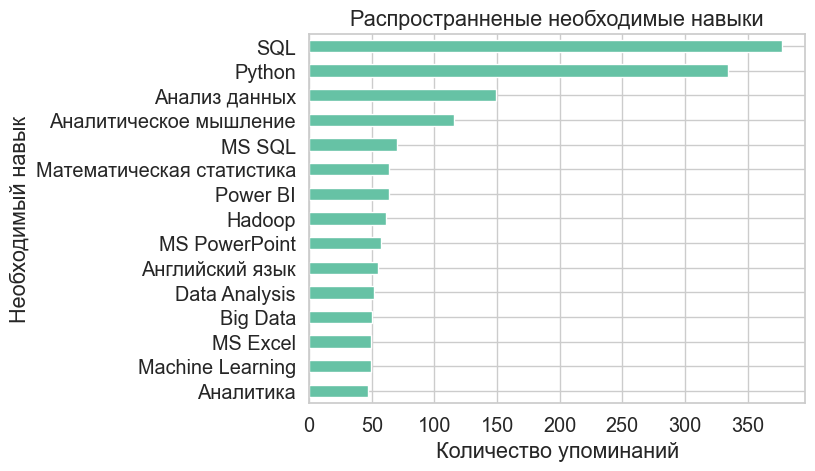

In [77]:
fig, ax = plt.subplots()
df_skills['skills'].value_counts()[:15].sort_values().plot(ax=ax, kind='barh')
plt.title('Распространненые необходимые навыки')
plt.xlabel('Количество упоминаний');
plt.ylabel('Необходимый навык');

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Будем анализировать только те, зарплаты в которых есть информация о salary.currency и хотя одна из границ зарплаты(from или to). Будем считать, что если одна из границ зарплаты отсутсвует, то она совпадает с известной.

In [219]:
df_salary = df_vacancy[['salary.from', 'salary.to', 'salary.currency', 'salary.gross']]
df_salary = df_salary.dropna(subset=['salary.currency'])
df_salary = df_salary[(df_salary['salary.from'].notna() | df_salary['salary.to'].notna())]
for index in range(len(df_salary)):
    if not(df_salary.iloc[index]['salary.from'] > 0):
        df_salary.iloc[index, [0]] = df_salary.iloc[index]['salary.to']
    if not(df_salary.iloc[index]['salary.to'] > 0):
        df_salary.iloc[index, [1]] = df_salary.iloc[index]['salary.from']
df_salary

,salary.from,salary.to,salary.currency,salary.gross
4,100000.0,100000.0,RUR,False
5,100000.0,100000.0,RUR,False
9,150000.0,290000.0,RUR,False
11,40000.0,40000.0,RUR,False
17,100000.0,100000.0,RUR,False
...,...,...,...,...
933,50000.0,50000.0,RUR,False
934,200000.0,200000.0,RUR,False
936,100000.0,120000.0,RUR,False
947,50000.0,50000.0,RUR,False


Загрузим курсы валют и добавим их в DataFrame c зарплатами(df_salary).

In [148]:
currency_url = 'https://api.hh.ru/dictionaries'
req = requests.get(currency_url)
data = json.loads(req.content.decode())
codes = [] 
rates = []
for item in data['currency']:
    codes.append(item['code'])
    rates.append(item['rate'])
df_currency = pd.DataFrame(list(zip(codes, rates)), columns =['code', 'rate'])
df_currency

,code,rate
0,AZN,0.022699
1,BYR,0.037411
2,EUR,0.012576
3,GEL,0.035079
4,KGS,1.167262
5,KZT,5.997073
6,RUR,1.000000
7,UAH,0.492291
8,USD,0.013352
9,UZS,151.148730


In [220]:
df_salary = pd.merge(df_salary, df_currency, left_on= 'salary.currency', right_on='code', how = 'left')
df_salary

,salary.from,salary.to,salary.currency,salary.gross,code,rate
0,100000.0,100000.0,RUR,False,RUR,1.0
1,100000.0,100000.0,RUR,False,RUR,1.0
2,150000.0,290000.0,RUR,False,RUR,1.0
3,40000.0,40000.0,RUR,False,RUR,1.0
4,100000.0,100000.0,RUR,False,RUR,1.0
...,...,...,...,...,...,...
191,50000.0,50000.0,RUR,False,RUR,1.0
192,200000.0,200000.0,RUR,False,RUR,1.0
193,100000.0,120000.0,RUR,False,RUR,1.0
194,50000.0,50000.0,RUR,False,RUR,1.0


Переведем все зарплаты в рубли и при необходимости вычтем налог.

In [221]:
df_salary['salary.from'] /= df_salary['rate']
df_salary['salary.to'] /= df_salary['rate']
df_salary['rate'] = 1.0
df_salary['salary.currency'] = 'RUR'

In [222]:
for index in range(len(df_salary)):
    if df_salary.iloc[index]['salary.gross']:
        df_salary.iloc[index, [0]] = df_salary.iloc[index]['salary.from'] * 0.87
        df_salary.iloc[index, [1]] = df_salary.iloc[index]['salary.to']* 0.87
df_salary['salary.gross'] = False
df_salary

,salary.from,salary.to,salary.currency,salary.gross,code,rate
0,100000.0,100000.0,RUR,False,RUR,1.0
1,100000.0,100000.0,RUR,False,RUR,1.0
2,150000.0,290000.0,RUR,False,RUR,1.0
3,40000.0,40000.0,RUR,False,RUR,1.0
4,100000.0,100000.0,RUR,False,RUR,1.0
...,...,...,...,...,...,...
191,50000.0,50000.0,RUR,False,RUR,1.0
192,200000.0,200000.0,RUR,False,RUR,1.0
193,100000.0,120000.0,RUR,False,RUR,1.0
194,50000.0,50000.0,RUR,False,RUR,1.0


Основные характеристики зарплат.

In [223]:
df_salary.describe()

,salary.from,salary.to,rate
count,196.000000,196.000000,196.0
mean,123937.943479,151206.610519,1.0
std,81552.393026,110686.973237,0.0
min,456.111444,456.111444,1.0
25%,70000.000000,85912.500000,1.0
50%,100000.000000,120000.000000,1.0
75%,150000.000000,200000.000000,1.0
max,553435.114504,1000000.000000,1.0


Построим гистограмму распределения нижней и верхней границ зарплаты. Для большей информативности графика удалим выбросы зарплат.

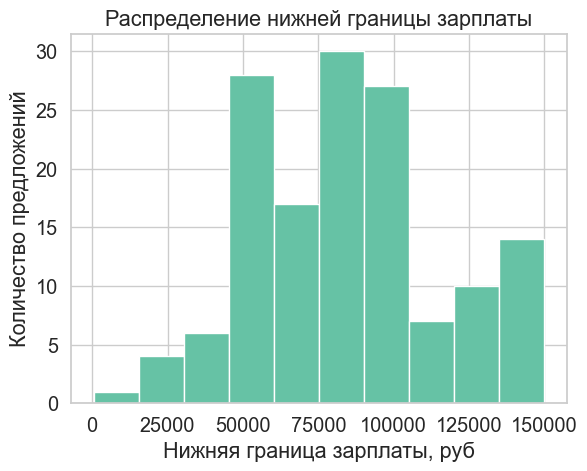

In [224]:
df_salary.loc[df_salary['salary.to'] > df_salary['salary.to'].quantile(0.85)] = np.nan
df_salary.loc[df_salary['salary.from'] > df_salary['salary.from'].quantile(0.85)] = np.nan
df_salary = df_salary.dropna()
plt.hist(df_salary["salary.from"])
plt.title('Распределение нижней границы зарплаты')
plt.xlabel('Нижняя граница зарплаты, руб')
plt.ylabel('Количество предложений')
plt.show() 

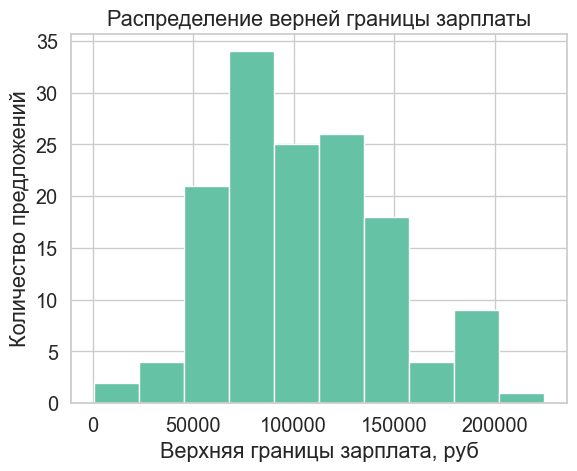

In [225]:
plt.hist(df_salary["salary.to"])
plt.title('Распределение верней границы зарплаты')
plt.xlabel('Верхняя границы зарплата, руб')
plt.ylabel('Количество предложений')
plt.show() 

Анализ вакансий в Москве в Data Science показал, что для аналитика наиболее востребованными являются навыки вкладения SQL и Python. Средняя зарплата специалиста в этой сфере находится в диапозоне от 100000 до 120000 рублей.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Проведем анализ вакансий Golang разработчика в Москве. Сначала найдем все предложения по этой специальности.

In [6]:
URL = 'https://api.hh.ru/vacancies'
num_pages = 2000
per_page = 100
new_df = pd.DataFrame()
df = pd.DataFrame()
for i in range(0, num_pages):
    per_page = min(100, 2000 // (i + 1))
    params = {
        'text': '"Golang разработчик" or "Golang developer" or "Go разработчик" or "Golang Developer"',
        'area': 1,
        'page': i,
        'per_page': per_page
    }
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    new_df = pd.json_normalize(data['items'])
    df = pd.concat([new_df, df], ignore_index=True, sort=False)
    sleep(0.3)

In [9]:
df.drop_duplicates(subset=['id'])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,insider_interview.id,insider_interview.url
0,73985455,False,Go Developer/ Старший инженер-программист (Go),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76294333,False,Senior Go Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77139792,False,Middle/Middle+ Go Developer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75909510,False,Go-разработчик (Middle/Senior),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76204649,False,Go разработчик,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузим подробное описание каждой специальности.

In [10]:
df_vacancy = pd.DataFrame()
new_df_vacancy = pd.DataFrame()
for vacancy in df['id']:
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    new_df_vacancy = pd.json_normalize(vacancy_info)
    df_vacancy = pd.concat([new_df_vacancy, df_vacancy], ignore_index=True, sort=False)

Сохраним полученную таблицу в формате xlsx.

In [13]:
df_vacancy.to_excel("vacancy_go.xlsx")

Количество доступных вакансий:

In [14]:
len(df_vacancy)

255

Рассмотрим навыки, которые чаще всего встречаются по данной специальности.

In [15]:
dist_skills = []
skills = []
for first_item in df_vacancy['key_skills']:
    if i != np.nan:
        for second_item in first_item:
            skills += [i for i in second_item.values()]
df_skills = pd.DataFrame({'skills': skills})

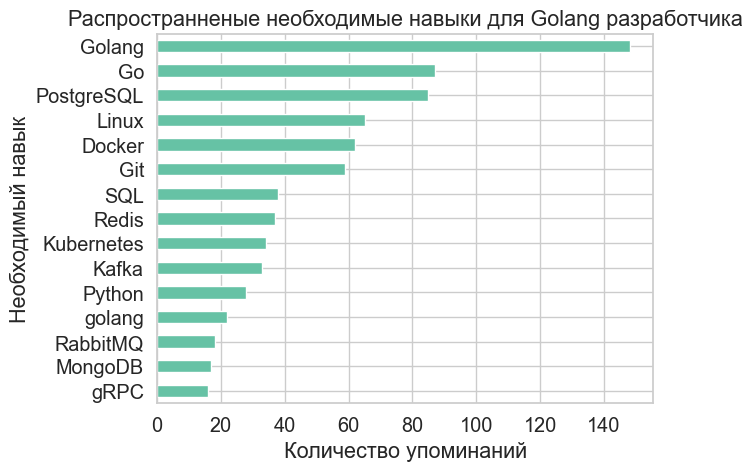

In [68]:
fig, ax = plt.subplots()
df_skills['skills'].value_counts()[:15].sort_values().plot(ax=ax, kind='barh')
plt.title('Распространненые необходимые навыки для Golang разработчика')
plt.xlabel('Количество упоминаний');
plt.ylabel('Необходимый навык');

Самыми распространнеными навыками являются знание языка Golang и PostgreSQL.

Проанализируем предлагаемые зарплаты в данной сфере. Будем анализировать только те, зарплаты в которых есть информация о salary.currency и хотя одна из границ зарплаты(from или to). Будем считать, что если одна из границ зарплаты отсутсвует, то она совпадает с известной.

In [91]:
df_salary = df_vacancy[['salary.from', 'salary.to', 'salary.currency', 'salary.gross']]
df_salary = df_salary.dropna(subset=['salary.currency'])
df_salary = df_salary[(df_salary['salary.from'].notna() | df_salary['salary.to'].notna())]
for index in range(len(df_salary)):
    if df_salary.iloc[index]['salary.from'] is None:
        df_salary.iloc[index, [0]] = df_salary.iloc[index]['salary.to']
    if df_salary.iloc[index]['salary.to'] is None:
        df_salary.iloc[index, [1]] = df_salary.iloc[index]['salary.from']
df_salary

,salary.from,salary.to,salary.currency,salary.gross
0,200000.0,320000,RUR,False
3,240000.0,240000.0,RUR,False
4,250000.0,250000.0,RUR,False
7,180000.0,180000.0,RUR,False
10,180000.0,270000,RUR,False
...,...,...,...,...
243,120000.0,120000.0,RUR,False
247,150000.0,150000.0,RUR,True
248,270000.0,270000.0,RUR,False
250,200000.0,200000.0,RUR,False


In [19]:
currency_url = 'https://api.hh.ru/dictionaries'
req = requests.get(currency_url)
data = json.loads(req.content.decode())
codes = [] 
rates = []
for item in data['currency']:
    codes.append(item['code'])
    rates.append(item['rate'])
df_currency = pd.DataFrame(list(zip(codes, rates)), columns =['code', 'rate'])
df_currency

,code,rate
0,AZN,0.022529
1,BYR,0.037443
2,EUR,0.012493
3,GEL,0.034541
4,KGS,1.158507
5,KZT,5.773839
6,RUR,1.000000
7,UAH,0.489426
8,USD,0.013252
9,UZS,150.597874


In [92]:
df_salary = pd.merge(df_salary, df_currency, left_on= 'salary.currency', right_on='code', how = 'left')
df_salary

,salary.from,salary.to,salary.currency,salary.gross,code,rate
0,200000.0,320000,RUR,False,RUR,1.000000
1,240000.0,240000.0,RUR,False,RUR,1.000000
2,250000.0,250000.0,RUR,False,RUR,1.000000
3,180000.0,180000.0,RUR,False,RUR,1.000000
4,180000.0,270000,RUR,False,RUR,1.000000
...,...,...,...,...,...,...
68,120000.0,120000.0,RUR,False,RUR,1.000000
69,150000.0,150000.0,RUR,True,RUR,1.000000
70,270000.0,270000.0,RUR,False,RUR,1.000000
71,200000.0,200000.0,RUR,False,RUR,1.000000


Переведем все зарплаты в рубли и при необходимости вычтем налог.

In [93]:
df_salary['salary.from'] /= df_salary['rate']
df_salary['salary.to'] /= df_salary['rate']
df_salary['rate'] = 1.0
df_salary['salary.currency'] = 'RUR'

In [95]:
for index in range(len(df_salary)):
    if df_salary.iloc[index]['salary.gross']:
        df_salary.iloc[index, [0]] = df_salary.iloc[index]['salary.from'] * 0.87
        df_salary.iloc[index, [1]] = df_salary.iloc[index]['salary.to']* 0.87
df_salary['salary.gross'] = False
df_salary.describe()

,salary.from,salary.to,rate
count,63.000000,73.000000,73.0
mean,239302.147212,293323.600376,1.0
std,87301.589273,105906.961061,0.0
min,60000.000000,90000.000000,1.0
25%,185000.000000,200000.000000,1.0
50%,226380.923634,300000.000000,1.0
75%,300000.000000,350000.000000,1.0
max,560313.775714,560313.775714,1.0


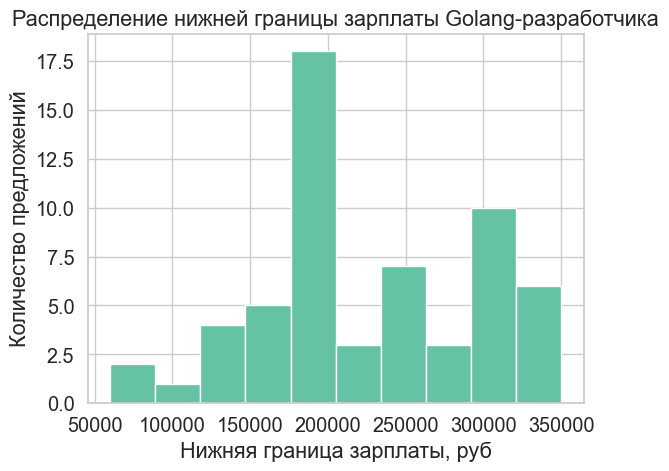

In [96]:
df_salary.loc[df_salary['salary.to'] > df_salary['salary.to'].quantile(0.95)] = np.nan
df_salary.loc[df_salary['salary.from'] > df_salary['salary.from'].quantile(0.95)] = np.nan
df_salary = df_salary.dropna()
plt.hist(df_salary["salary.from"])
plt.title('Распределение нижней границы зарплаты Golang-разработчика')
plt.xlabel('Нижняя граница зарплаты, руб')
plt.ylabel('Количество предложений')
plt.show() 

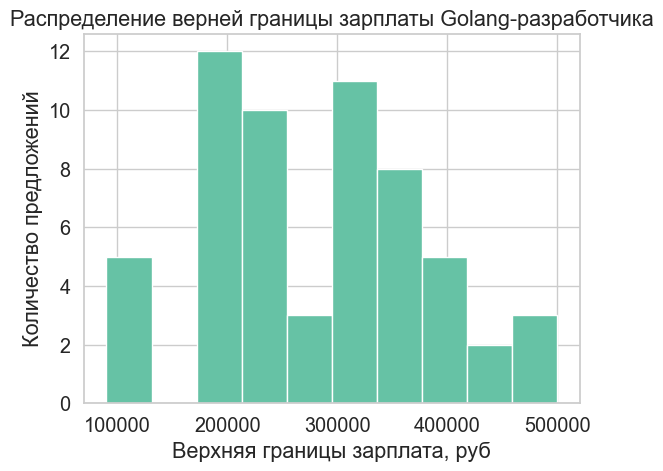

In [97]:
plt.hist(df_salary["salary.to"])
plt.title('Распределение верней границы зарплаты Golang-разработчика')
plt.xlabel('Верхняя границы зарплата, руб')
plt.ylabel('Количество предложений')
plt.show() 

Анализ вакансий Golang-разработчика в Москве показал, что для таких специалистов наиболее востребованными являются навыки вкладения Golang и PostgreSQL. Средняя зарплата специалиста в этой сфере находится в диапозоне от 225000 до 300000 рублей.